In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import networkit as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from IPython.display import display, Math, Latex, Markdown
from tqdm.notebook import tqdm

from cluster_filter import cfilter, cassign

from External.ICT.calculate_ICT import calculate_ICT, calculate_sub_ICTs
from External.clustering import centers, k_means_pp
from External.generation import create_graph
from External.plotting import plot_points, plot_graph, no_intersections
from External.create_k_nearest import patch_together

plt.style.use('standard.mplstyle')

cv2 package not present. No movies possible


In [5]:
# Hyperparameters
mode = "K_Nearest"
metric = "euclidean"
dataset = "non_convex"
ICT_algorithm = "cluster_all"


min_cluster_size = 12
small_behavior = "reassign"

# image loading
n = number_of_nodes = 1000
Random = True
image_name = "image"

# for the filename
parameters = "2-0_5-1000"

In [6]:
def load_image(filename):
    a=plt.imread(filename+'.png')
    rgb_weights = [0.2989, 0.5870, 0.1140]
    
    grayscale_image = np.dot(a[...,:3], rgb_weights)>0
    
    return grayscale_image
    
    
def sample_points_from_image(n,img,Random=True):
    if not Random:
        random.seed(42)
    non_zero = np.where(img!=0)
    # non_zero=np.vstack((non_zero[0],non_zero[1])).T
    
    
    idx = random.sample(range(len(non_zero[0])),n)
    
    x_coord = non_zero[0][idx]
    y_coord = non_zero[1][idx]
    return x_coord,y_coord

In [7]:
# Compute the position array
img = load_image(image_name)
position = np.array(sample_points_from_image(n,img,Random)).T
position = StandardScaler().fit_transform(position)

# Compute knearest graph


# ε, δ = 0.03, 0.1
# r = 1 / (ε**2) * (int(np.log2(number_of_nodes - 1)) + 1 + np.log(1/δ))
# k = int(np.sqrt(r))
# k = np.min((k, number_of_nodes))


k = 10

cluster_centers, cluster_labels = k_means_pp(k, position, return_labels=True)

if small_behavior == "remove":
    cluster_centers, cluster_labels, (position, ) = cfilter(cluster_centers, cluster_labels, t=min_cluster_size, position_likes=[position])
    number_of_nodes = len(position)
if small_behavior == "reassign":
    cluster_centers, cluster_labels = cassign(cluster_centers, cluster_labels, position, t=min_cluster_size)
    
sub_ICTs, components = calculate_sub_ICTs(position, cluster_centers, cluster_labels, t=min_cluster_size)


# plot the ICT forest
ICT_forest = nk.graph.Graph(n=len(position), weighted=True)
distances = pairwise_distances(position, position)
for component, sub_ICT in zip(components, sub_ICTs):
    for u, v, w in sub_ICT.iterEdgesWeights():
        nodeA = component[u]
        nodeB = component[v]
        ICT_forest.addEdge(nodeA, nodeB, distances[nodeA, nodeB])
        
ICT_forest.indexEdges()

sklearn is done: 0.21842527389526367
My own part is done: 0.0011935234069824219


  0%|          | 0/10 [00:00<?, ?it/s]

Final k: 11


create edgeId array:   0%|          | 0/784 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/784 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/122 [00:00<?, ?it/s]

update Arr 784 -> 705
update Arr 705 -> 639
update Arr 639 -> 577
update Arr 577 -> 520
update Arr 520 -> 472
update Arr 472 -> 424
update Arr 424 -> 380
update Arr 380 -> 342
update Arr 342 -> 303
update Arr 303 -> 273
update Arr 273 -> 246
update Arr 246 -> 223
update Arr 223 -> 199
update Arr 199 -> 174
update Arr 174 -> 154
update Arr 154 -> 139
update Arr 139 -> 132
update Arr 132 -> 128
update Arr 128 -> 123
update Arr 123 -> 123
update Arr 123 -> 122
Final k: 11


create edgeId array:   0%|          | 0/767 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/767 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/118 [00:00<?, ?it/s]

update Arr 767 -> 695
update Arr 695 -> 622
update Arr 622 -> 561
update Arr 561 -> 503
update Arr 503 -> 455
update Arr 455 -> 408
update Arr 408 -> 356
update Arr 356 -> 322
update Arr 322 -> 291
update Arr 291 -> 261
update Arr 261 -> 236
update Arr 236 -> 212
update Arr 212 -> 192
update Arr 192 -> 173
update Arr 173 -> 157
update Arr 157 -> 139
update Arr 139 -> 126
update Arr 126 -> 124
update Arr 124 -> 121
update Arr 121 -> 119
update Arr 119 -> 118
Final k: 11


create edgeId array:   0%|          | 0/648 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/648 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/100 [00:00<?, ?it/s]

update Arr 648 -> 578
update Arr 578 -> 514
update Arr 514 -> 463
update Arr 463 -> 418
update Arr 418 -> 377
update Arr 377 -> 342
update Arr 342 -> 310
update Arr 310 -> 281
update Arr 281 -> 251
update Arr 251 -> 226
update Arr 226 -> 204
update Arr 204 -> 184
update Arr 184 -> 159
update Arr 159 -> 143
update Arr 143 -> 126
update Arr 126 -> 112
update Arr 112 -> 107
update Arr 107 -> 106
update Arr 106 -> 101
update Arr 101 -> 101
update Arr 101 -> 100
Final k: 11


create edgeId array:   0%|          | 0/510 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/510 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/79 [00:00<?, ?it/s]

update Arr 510 -> 447
update Arr 447 -> 400
update Arr 400 -> 359
update Arr 359 -> 326
update Arr 326 -> 296
update Arr 296 -> 269
update Arr 269 -> 244
update Arr 244 -> 221
update Arr 221 -> 198
update Arr 198 -> 175
update Arr 175 -> 156
update Arr 156 -> 139
update Arr 139 -> 117
update Arr 117 -> 104
update Arr 104 -> 94
update Arr 94 -> 87
update Arr 87 -> 85
update Arr 85 -> 81
update Arr 81 -> 80
update Arr 80 -> 79
Final k: 11


create edgeId array:   0%|          | 0/461 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/461 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/70 [00:00<?, ?it/s]

update Arr 461 -> 405
update Arr 405 -> 366
update Arr 366 -> 326
update Arr 326 -> 293
update Arr 293 -> 257
update Arr 257 -> 233
update Arr 233 -> 210
update Arr 210 -> 186
update Arr 186 -> 166
update Arr 166 -> 148
update Arr 148 -> 134
update Arr 134 -> 118
update Arr 118 -> 106
update Arr 106 -> 96
update Arr 96 -> 85
update Arr 85 -> 80
update Arr 80 -> 74
update Arr 74 -> 71
update Arr 71 -> 71
update Arr 71 -> 70
Final k: 11


create edgeId array:   0%|          | 0/795 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/795 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/123 [00:00<?, ?it/s]

update Arr 795 -> 719
update Arr 719 -> 645
update Arr 645 -> 567
update Arr 567 -> 514
update Arr 514 -> 466
update Arr 466 -> 422
update Arr 422 -> 382
update Arr 382 -> 345
update Arr 345 -> 308
update Arr 308 -> 277
update Arr 277 -> 248
update Arr 248 -> 221
update Arr 221 -> 200
update Arr 200 -> 179
update Arr 179 -> 161
update Arr 161 -> 143
update Arr 143 -> 130
update Arr 130 -> 127
update Arr 127 -> 125
update Arr 125 -> 124
update Arr 124 -> 124
Final k: 11


create edgeId array:   0%|          | 0/641 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/641 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/100 [00:00<?, ?it/s]

update Arr 641 -> 578
update Arr 578 -> 523
update Arr 523 -> 470
update Arr 470 -> 425
update Arr 425 -> 379
update Arr 379 -> 344
update Arr 344 -> 311
update Arr 311 -> 278
update Arr 278 -> 247
update Arr 247 -> 221
update Arr 221 -> 194
update Arr 194 -> 174
update Arr 174 -> 158
update Arr 158 -> 141
update Arr 141 -> 128
update Arr 128 -> 115
update Arr 115 -> 110
update Arr 110 -> 108
update Arr 108 -> 103
update Arr 103 -> 102
update Arr 102 -> 100
Final k: 11


create edgeId array:   0%|          | 0/595 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/595 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/93 [00:00<?, ?it/s]

update Arr 595 -> 534
update Arr 534 -> 475
update Arr 475 -> 430
update Arr 430 -> 388
update Arr 388 -> 349
update Arr 349 -> 304
update Arr 304 -> 275
update Arr 275 -> 245
update Arr 245 -> 215
update Arr 215 -> 193
update Arr 193 -> 170
update Arr 170 -> 149
update Arr 149 -> 135
update Arr 135 -> 116
update Arr 116 -> 105
update Arr 105 -> 103
update Arr 103 -> 98
update Arr 98 -> 96
update Arr 96 -> 94
update Arr 94 -> 93
Final k: 11


create edgeId array:   0%|          | 0/569 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/569 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/86 [00:00<?, ?it/s]

update Arr 569 -> 501
update Arr 501 -> 443
update Arr 443 -> 383
update Arr 383 -> 344
update Arr 344 -> 311
update Arr 311 -> 282
update Arr 282 -> 253
update Arr 253 -> 224
update Arr 224 -> 192
update Arr 192 -> 171
update Arr 171 -> 150
update Arr 150 -> 133
update Arr 133 -> 120
update Arr 120 -> 108
update Arr 108 -> 95
update Arr 95 -> 88
update Arr 88 -> 87
update Arr 87 -> 87
update Arr 87 -> 86
Final k: 11


create edgeId array:   0%|          | 0/643 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/643 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/99 [00:00<?, ?it/s]

update Arr 643 -> 583
update Arr 583 -> 523
update Arr 523 -> 469
update Arr 469 -> 423
update Arr 423 -> 378
update Arr 378 -> 343
update Arr 343 -> 310
update Arr 310 -> 273
update Arr 273 -> 242
update Arr 242 -> 214
update Arr 214 -> 194
update Arr 194 -> 173
update Arr 173 -> 156
update Arr 156 -> 128
update Arr 128 -> 115
update Arr 115 -> 106
update Arr 106 -> 103
update Arr 103 -> 101
update Arr 101 -> 100
update Arr 100 -> 100


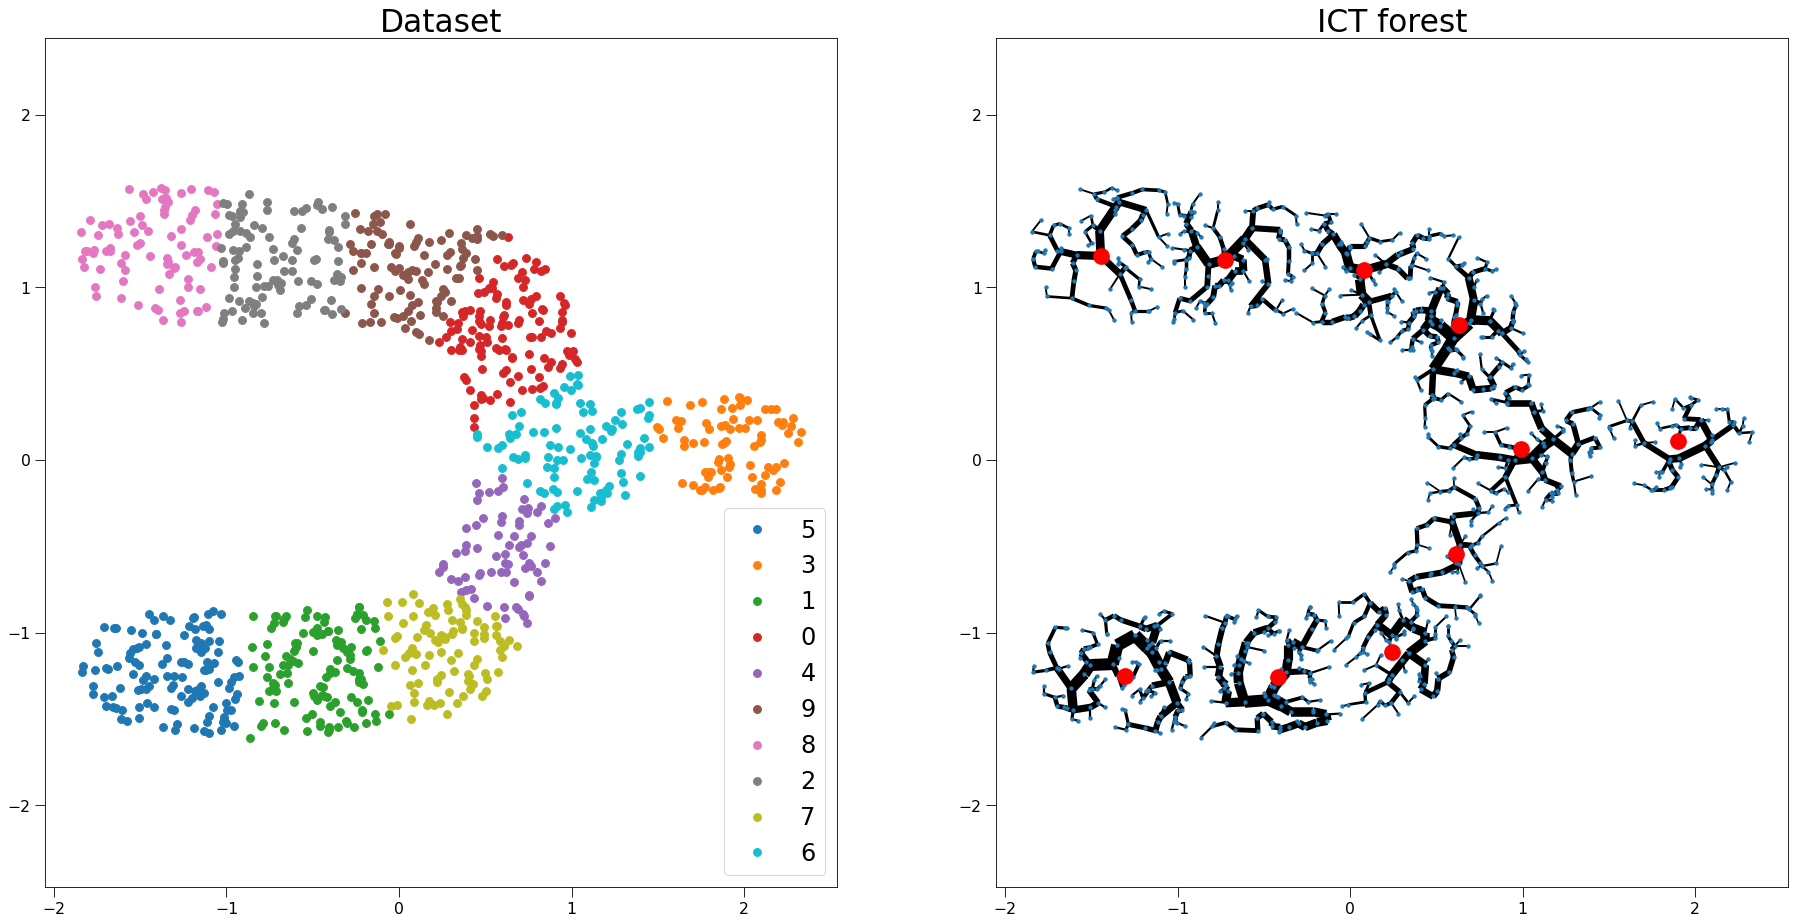

In [8]:
# Plot the prepared data
fig, axs = plt.subplots(1, 2)
plot_points(position, "Dataset", axs[0], labels=np.array(cluster_labels))
plot_graph(ICT_forest, position, "ICT forest", axs[1], cluster_centers)
plt.show()

In [12]:
G = patch_together(ICT_forest, position, bridges=10)

ICT = calculate_ICT(G, algorithm_type=ICT_algorithm, cluster_centers=cluster_centers,
                                zeros_stay_zeros=True, update_G=1.1)
ICT.indexEdges()

Patching the components together:   0%|          | 0/10 [00:00<?, ?it/s]

create edgeId array:   0%|          | 0/1055 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/1055 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/999 [00:00<?, ?it/s]

update Arr 1055 -> 1006
added 283 edges early
update Arr 1006 -> 1006
update Arr 1006 -> 1005
added 2 edges early
update Arr 1005 -> 1005
update Arr 1005 -> 1005
update Arr 1005 -> 1005
update Arr 1005 -> 1005
update Arr 1005 -> 1005
update Arr 1005 -> 1004
added 2 edges early
update Arr 1004 -> 1003
added 2 edges early
update Arr 1003 -> 1003
update Arr 1003 -> 1000
added 4 edges early
update Arr 1000 -> 1000
update Arr 1000 -> 1000
update Arr 1000 -> 1000
update Arr 1000 -> 1000
update Arr 1000 -> 1000
update Arr 1000 -> 1000
update Arr 1000 -> 1000
update Arr 1000 -> 1000
update Arr 1000 -> 1000
update Arr 1000 -> 1000
update Arr 1000 -> 1000
update Arr 1000 -> 999
added 2 edges early
added 567 edges early


In [13]:
max_st = nk.graph.RandomMaximumSpanningForest(G)
max_st.run()
max_st = max_st.getMSF(True)
max_st.indexEdges()
G_inv = nk.graph.Graph(n=G.numberOfNodes(), weighted=True)
for u,v,w in G.iterEdgesWeights():
    G_inv.addEdge(u,v,1/w)

min_st = nk.graph.RandomMaximumSpanningForest(G_inv)
min_st.run()
min_st = min_st.getMSF(True)
min_st.indexEdges()

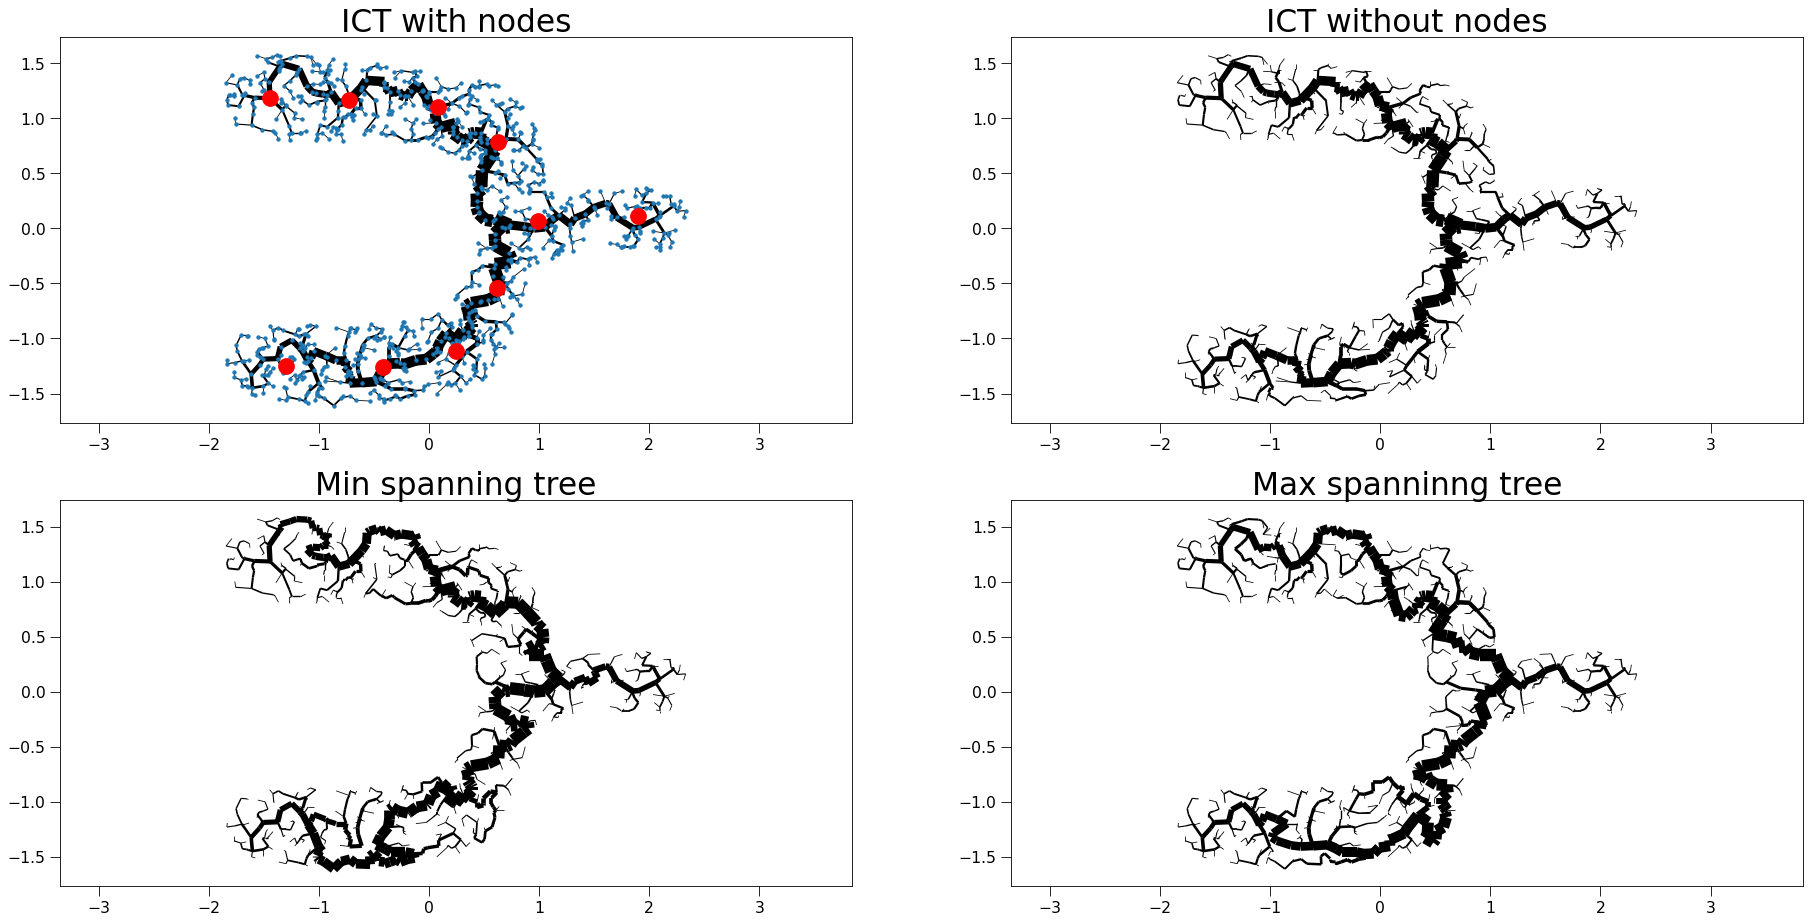

In [14]:
# Plot the ICT
fig, axs = plt.subplots(2, 2)
plot_graph(ICT, position, "ICT with nodes", axs[0,0], cluster_centers)
plot_graph(ICT, position, "ICT without nodes", axs[0,1], node_size=0)
plot_graph(max_st, position, "Max spanninng tree", axs[1,1], node_size=0)
plot_graph(min_st, position, "Min spanning tree", axs[1,0], node_size=0)
# plt.savefig(dataset+"-"+parameters+".png")